# Group Project 2 - Database

Group Member:
    * Mengxin Tan G38541671 
    * Zili Bu(Group_Leader) G36963059 
    * Michael Lombardo G47242943 
    * Junyi Qian G37449683 

#### Participation and responsibility

* We splite the project into two parts. Me and Mengxin are responsible for 1-4 questions, and Michael and Junyi works on 5-8. Then we discuss Q9 together. 
* We communicate online to discuss our initial idea and attempts for each questions and spend 4 hours to combine our 1-8 questions together and check if there is any problem on our coding and logics.
* After finish the whole project, we all run it from beginning to test the reproductivity and fix some bugs or errors. 

### Setup - Check the environment

In [1]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.3.9
psycopg2==2.7.5
psycopg2-binary==2.7.5


### Setup - Build a new db

In [4]:
!dropdb -U student fec_fin # If we get an error here, we are good to go.

In [5]:
!createdb -U student fec_fin # dbname: fec_fin, username: student

##### NOTE: Everytime when you restart the kernel, you should run the following two commands to connect to the db.

In [1]:
%load_ext sql

Now use commands to connect to the database we just created:

In [2]:
%sql postgresql://student@/fec_fin

'Connected: student@fec_fin'

## Q1 
### Create 5 tables for 5 entities

#### 1.ALL CANDIDATES

In [8]:
%%sql
DROP TABLE IF EXISTS ALL_CAND CASCADE;

CREATE TABLE ALL_CAND (
    CAND_ID VARCHAR(9) NOT NULL,
    CAND_NAME VARCHAR(200),
    CAND_ICI VARCHAR(1),
    PTY_CD VARCHAR(1) CHECK (PTY_CD in ('1','2','3')),
    CAND_PTY_AFFILIATION VARCHAR(3),
    TTL_RECEIPTS NUMERIC(14,2),
    TRANS_FROM_AUTH NUMERIC(14,2),
    TTL_DISB NUMERIC(14,2),
    TRANS_TO_AUTH NUMERIC(14,2),
    COH_BOP NUMERIC(14,2),
    COH_COP NUMERIC(14,2),
    CAND_CONTRIB NUMERIC(14,2),
    CAND_LOANS NUMERIC(14,2),
    OTHER_LOANS NUMERIC(14,2),
    CAND_LOAN_REPAY NUMERIC(14,2),
    OTHER_LOAN_REPAY NUMERIC(14,2),
    DEBTS_OWED_BY NUMERIC(14,2),
    TTL_INDIV_CONTRIB NUMERIC(14,2),
    CAND_OFFICE_ST VARCHAR(2),
    CAND_OFFICE_DISTRICT VARCHAR(2),
    SPEC_ELECTION VARCHAR(1) DEFAULT NULL,
    PRIM_ELECTION VARCHAR(1) DEFAULT NULL,
    RUN_ELECTION VARCHAR(1) DEFAULT NULL,
    GEN_ELECTION VARCHAR(1) DEFAULT NULL,
    GEN_ELECTION_PRECENT NUMERIC(7,4),
    OTHER_POL_CMTE_CONTRIB NUMERIC(14,2),
    POL_PTY_CONTRIB NUMERIC(14,2),
    CVG_DEN_DT DATE, --CHECK (DATE BETWEEN '2007-01-01' AND '2008-12-31')
    INDIV_REFUNDS NUMERIC(14,2),
    CMTE_REFUNDS NUMERIC(14,2),
    
    PRIMARY KEY (CAND_ID)
    
    --reference cannot be made now
);

 * postgresql://student@/fec_fin
Done.
Done.


[]

After check whether the CVG_DEN_DT is in year 2007 or 2008, we find that the data is not tidy in this column because we find nine lines of data are from 2009. So we use query later to filter the data.

Add comment to the table ALL_CAND

In [9]:
%%sql
COMMENT ON TABLE ALL_CAND IS 
'The all candidates file contains summary financial information for each candidate who raised or spent money during the period, regardless of when they are up for election.'

 * postgresql://student@/fec_fin
Done.


[]

Add comment to the column of table ALL_CAND

In [10]:
%%sql
COMMENT ON COLUMN ALL_CAND.CAND_ID IS 'Candidate identification';

 * postgresql://student@/fec_fin
Done.


[]

In [11]:
%%sql
SELECT * FROM ALL_CAND; --CHECK THE TABLE CREATED ABOVE

 * postgresql://student@/fec_fin
0 rows affected.


cand_id,cand_name,cand_ici,pty_cd,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,cand_contrib,cand_loans,other_loans,cand_loan_repay,other_loan_repay,debts_owed_by,ttl_indiv_contrib,cand_office_st,cand_office_district,spec_election,prim_election,run_election,gen_election,gen_election_precent,other_pol_cmte_contrib,pol_pty_contrib,cvg_den_dt,indiv_refunds,cmte_refunds


#### 2.CANDIDATE MASTER

In [12]:
%%sql
DROP TABLE IF EXISTS CAND_MSTR CASCADE;

CREATE TABLE CAND_MSTR (
    CAND_ID VARCHAR(9) NOT NULL,
    CAND_NAME VARCHAR(200),
    CAND_PTY_AFFILIATION VARCHAR(3),
    CAND_ELECTION_YR NUMERIC(4),
    CAND_OFFICE_ST VARCHAR(2),
    CAND_OFFICE VARCHAR(1) CHECK (CAND_OFFICE in ('H','P','S')),
    CAND_OFFICE_DISTRICT VARCHAR(2),
    CAND_ICI VARCHAR(1) CHECK (CAND_ICI in ('C','I','O')),
    CAND_STATUS VARCHAR(1),
    CAND_PCC VARCHAR(9),
    CAND_ST1 VARCHAR(34),
    CAND_ST2 VARCHAR(34),
    CAND_CITY VARCHAR(30),
    CAND_ST VARCHAR(2),
    CAND_ZIP VARCHAR(9) DEFAULT '00000',
    
    PRIMARY KEY (CAND_ID)
);

 * postgresql://student@/fec_fin
Done.
Done.


[]

In [13]:
%%sql
COMMENT ON TABLE CAND_MSTR IS 'The candidate master file contains basic information for each candidate.'

 * postgresql://student@/fec_fin
Done.


[]

In [14]:
%%sql
COMMENT ON COLUMN CAND_MSTR.CAND_ID IS 'Candidate identification';
COMMENT ON COLUMN CAND_MSTR.CAND_PCC IS 'The ID assigned by the Federal Election Commission to the candidates principal campaign committee for a given election cycle.';

 * postgresql://student@/fec_fin
Done.
Done.


[]

#### 3.COMMITTEE MASTER

In [15]:
%%sql
DROP TABLE IF EXISTS CMTE_MSTR CASCADE;

CREATE TABLE CMTE_MSTR (
    CMTE_ID VARCHAR(9) NOT NULL,
    CMTE_NM VARCHAR(200),
    TRES_NM VARCHAR(90),
    CMTE_ST1 VARCHAR(34),
    CMTE_ST2 VARCHAR(34),
    CMTE_CITY VARCHAR(30),
    CMTE_ST VARCHAR(2),
    CMTE_ZIP VARCHAR(9) DEFAULT '00000',
    CMTE_DSGN VARCHAR(1) CHECK (CMTE_DSGN in ('A','B','D','J','P','U')),
    CMTE_TP VARCHAR(1),
    CMTE_PTY_AFFILIATION VARCHAR(3),
    CMTE_FILING_FREQ VARCHAR(1) CHECK (CMTE_FILING_FREQ in ('A','D','M','Q','T','W')),
    ORG_TP VARCHAR(1),
    CONNECTED_ORG_NM VARCHAR(200),
    CAND_ID VARCHAR(9),
    
    PRIMARY KEY (CMTE_ID),
    FOREIGN KEY (CAND_ID) REFERENCES CAND_MSTR (CAND_ID)
);

 * postgresql://student@/fec_fin
Done.
Done.


[]

In [16]:
%%sql
COMMENT ON TABLE CMTE_MSTR IS 'The committee master file contains basic information for each committee registered with the Federal Election Commission.'

 * postgresql://student@/fec_fin
Done.


[]

In [17]:
%%sql
COMMENT ON COLUMN CMTE_MSTR.CMTE_ID IS 'Committee IDs are unique and an ID for a specific committee always remains the same.';
COMMENT ON COLUMN CMTE_MSTR.CAND_ID IS 'When a committee has a committee type designation of H, S, or P, the candidates identification number will be entered in this field.';

 * postgresql://student@/fec_fin
Done.
Done.


[]

#### 4.CONTRIBUTION BY INDIVIDUALS

In [18]:
%%sql
DROP TABLE IF EXISTS CONTRIB_BY_IND CASCADE;

CREATE TABLE CONTRIB_BY_IND (
    CMTE_ID VARCHAR(9) NOT NULL,
    AMNDT_IND VARCHAR(1),
    RPT_TP VARCHAR(3),
    TRANSACTION_PGI VARCHAR(5),
    IMAGE_NUM VARCHAR(18),
    TRANSACTION_TP VARCHAR(3),
    ENTITY_TP VARCHAR(3),
    NAME VARCHAR(200),
    CITY VARCHAR(30),
    STATE VARCHAR(2),
    ZIP_CODE VARCHAR(9) DEFAULT '000000000',
    EMPLOYER VARCHAR(38),
    OCCUPATION VARCHAR(38),
    TRANSACTION_DT VARCHAR(8), --NOTE: DATE TYPE IS DIFFERENT BETWEEN DB AND REAL DATA
    TRANSACTION_AMT NUMERIC(14,2),
    OTHER_ID VARCHAR(9),
    TRAN_ID VARCHAR(32), --UNIQUE
    FILE_NUM VARCHAR(22), --UNIQUE
    MEMO_CD VARCHAR(1),
    MEMO_TEXT VARCHAR(100),
    SUB_ID NUMERIC(19) UNIQUE,
    
    PRIMARY KEY (SUB_ID),
    FOREIGN KEY (CMTE_ID) REFERENCES CMTE_MSTR(CMTE_ID)
);

 * postgresql://student@/fec_fin
Done.
Done.


[]

Since the TRANSACTION_DT in the real data file has different type(mmddyyyy) from the default style in database so we have changed the data type from Date to Varchar. 

In [19]:
%%sql
COMMENT ON TABLE CONTRIB_BY_IND IS 'The contributions by individuals file contains information for contributions given by individuals.';
COMMENT ON COLUMN CONTRIB_BY_IND.CMTE_ID IS 'Filer identification number';
COMMENT ON COLUMN CONTRIB_BY_IND.OTHER_ID IS 'For contributions from individuals this column is null. For contributions from candidates or other committees this column will contain that contributors FEC ID.';
COMMENT ON COLUMN CONTRIB_BY_IND.TRAN_ID IS 'ONLY VALID FOR ELECTRONIC FILINGS. A unique identifier associated with each itemization or transaction appearing in an FEC electronic file. A transaction ID is unique for a specific committee for a specific report.';
COMMENT ON COLUMN CONTRIB_BY_IND.FILE_NUM IS 'Unique report id';
COMMENT ON COLUMN CONTRIB_BY_IND.SUB_ID IS 'Unique row ID';

 * postgresql://student@/fec_fin
Done.
Done.
Done.
Done.
Done.
Done.


[]

#### 5.CONTRIBUTIONS FROM COMMITTEES TO CANDIDATES

In [20]:
%%sql
DROP TABLE IF EXISTS CCC CASCADE;

CREATE TABLE CCC (
    CMTE_ID VARCHAR(9) NOT NULL,
    AMNDT_IND VARCHAR(1) CHECK (AMNDT_IND in ('N','A','T')),
    RPT_TP VARCHAR(3),
    TRANSACTION_PGI VARCHAR(5),
    IMAGE_NUM VARCHAR(18),
    TRANSACTION_TP VARCHAR(3),
    ENTITY_TP VARCHAR(3),
    NAME VARCHAR(200),
    CITY VARCHAR(30),
    STATE VARCHAR(2),
    ZIP_CODE VARCHAR(9) DEFAULT '00000',
    EMPLOYER VARCHAR(38),
    OCCUPATION VARCHAR(38),
    TRANSACTION_DT VARCHAR(8), --NOTE: DATE TYPE HAS DIFFERENCE BETWEEN DB AND REAL DATA
    TRANSACTION_AMT NUMERIC(14,2),
    OTHER_ID VARCHAR(9),
    CAND_ID VARCHAR(9),
    TRAN_ID VARCHAR(32),
    FILE_NUM VARCHAR(22),
    MEMO_CD VARCHAR(1),
    MEMO_TEXT VARCHAR(100),
    SUB_ID NUMERIC(19) UNIQUE,
    
    PRIMARY KEY(SUB_ID),
    FOREIGN KEY(CMTE_ID) REFERENCES CMTE_MSTR(CMTE_ID)
    --FOREIGN KEY(CAND_ID) REFERENCES ALL_CAND(CAND_ID)
    
);

 * postgresql://student@/fec_fin
Done.
Done.


[]

Since the TRANSACTION_DT in the real data file has different type(mmddyyyy) from the default style in database so we have changed the data type from Date to Varchar. 

In [21]:
%%sql
COMMENT ON TABLE CCC IS 'The contributions from committees to candidates file is a subset of the itemized records (OTH) file and contains each contribution or independent expenditure made by a PAC, Party committee, Candidate committee and Other federal committee.';
COMMENT ON COLUMN CCC.CMTE_ID IS 'Filer identification number';
COMMENT ON COLUMN CCC.OTHER_ID IS 'For contributions from individuals this column is null. For contributions from candidates or other committees this column will contain that contributors FEC ID.';
COMMENT ON COLUMN CCC.TRAN_ID IS 'ONLY VALID FOR ELECTRONIC FILINGS. A unique identifier associated with each itemization or transaction appearing in an FEC electronic file. A transaction ID is unique for a specific committee for a specific report.';
COMMENT ON COLUMN CCC.FILE_NUM IS 'Unique report id';
COMMENT ON COLUMN CCC.SUB_ID IS 'Unique row ID';
COMMENT ON COLUMN CCC.CAND_ID IS 'Candidate id';

 * postgresql://student@/fec_fin
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

## Q2
#### Once you have created the tables and their constraints construct (i.e. populate) them using the data files from years 2007-2008. For all constructed tables, find the total number of rows loaded. Check your answer using Linux or csvkit commands

#### Set up: Downloading the datafiles

In [22]:
!wget https://www.fec.gov/files/bulk-downloads/2008/weball08.zip #all condidates

--2019-11-04 02:27:06--  https://www.fec.gov/files/bulk-downloads/2008/weball08.zip
Resolving www.fec.gov (www.fec.gov)... 13.32.238.11, 13.32.238.14, 13.32.238.131, ...
Connecting to www.fec.gov (www.fec.gov)|13.32.238.11|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/weball08.zip [following]
--2019-11-04 02:27:06--  https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/weball08.zip
Resolving cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)... 52.95.144.20
Connecting to cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)|52.95.144.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123944 (12

In [23]:
!wget https://www.fec.gov/files/bulk-downloads/2008/cn08.zip #candidate master

--2019-11-04 02:27:10--  https://www.fec.gov/files/bulk-downloads/2008/cn08.zip
Resolving www.fec.gov (www.fec.gov)... 13.32.238.189, 13.32.238.131, 13.32.238.14, ...
Connecting to www.fec.gov (www.fec.gov)|13.32.238.189|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/cn08.zip [following]
--2019-11-04 02:27:10--  https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/cn08.zip
Resolving cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)... 52.95.144.20
Connecting to cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)|52.95.144.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153850 (150K) [appli

In [24]:
!wget https://www.fec.gov/files/bulk-downloads/2008/cm08.zip #committee master

--2019-11-04 02:27:13--  https://www.fec.gov/files/bulk-downloads/2008/cm08.zip
Resolving www.fec.gov (www.fec.gov)... 13.32.238.189, 13.32.238.131, 13.32.238.14, ...
Connecting to www.fec.gov (www.fec.gov)|13.32.238.189|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/cm08.zip [following]
--2019-11-04 02:27:13--  https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/cm08.zip
Resolving cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)... 52.95.144.8
Connecting to cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)|52.95.144.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504959 (493K) [applica

In [25]:
!wget https://www.fec.gov/files/bulk-downloads/2008/indiv08.zip #contribution by individuals

--2019-11-04 02:27:16--  https://www.fec.gov/files/bulk-downloads/2008/indiv08.zip
Resolving www.fec.gov (www.fec.gov)... 13.32.238.189, 13.32.238.131, 13.32.238.14, ...
Connecting to www.fec.gov (www.fec.gov)|13.32.238.189|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/indiv08.zip [following]
--2019-11-04 02:27:16--  https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/indiv08.zip
Resolving cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)... 52.95.144.8
Connecting to cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)|52.95.144.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122023732 (11

In [26]:
!wget https://www.fec.gov/files/bulk-downloads/2008/pas208.zip #contribution from cmte to cand

--2019-11-04 02:27:28--  https://www.fec.gov/files/bulk-downloads/2008/pas208.zip
Resolving www.fec.gov (www.fec.gov)... 13.32.238.189, 13.32.238.131, 13.32.238.14, ...
Connecting to www.fec.gov (www.fec.gov)|13.32.238.189|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/pas208.zip [following]
--2019-11-04 02:27:28--  https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/pas208.zip
Resolving cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)... 52.95.143.32
Connecting to cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)|52.95.143.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10245179 (9.8M

In [27]:
#unzip all the headers 
!unzip cm08.zip
!unzip cn08.zip
!unzip indiv08.zip
!unzip pas208.zip
!unzip weball08.zip

Archive:  cm08.zip
  inflating: cm.txt                  
Archive:  cn08.zip
  inflating: cn.txt                  
Archive:  indiv08.zip
  inflating: itcont.txt              
Archive:  pas208.zip
  inflating: itpas2.txt              
Archive:  weball08.zip
  inflating: weball08.txt            


In [28]:
#convert txt to csv format for all 5 data files.
!touch cm.csv
!cat cm.txt > cm.csv

!touch cn.csv
!cat cn.txt > cn.csv

!touch itcont.csv
!cat itcont.txt > itcont.csv

!touch itpas2.csv
!cat itpas2.txt > itpas2.csv

!touch weball08.csv
!cat weball08.txt > weball08.csv

In [29]:
#download the header file if exists
!wget https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv #cand_mstr
!wget https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv #cmte_mstr
!wget https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv #conb_by_ind
!wget https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv #conb_fromctoc

--2019-11-04 02:28:38--  https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv
Resolving www.fec.gov (www.fec.gov)... 13.224.215.13, 13.224.215.22, 13.224.215.27, ...
Connecting to www.fec.gov (www.fec.gov)|13.224.215.13|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/data_dictionaries/cn_header_file.csv [following]
--2019-11-04 02:28:38--  https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/data_dictionaries/cn_header_file.csv
Resolving cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)... 52.95.144.40
Connecting to cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)|52.95.144.40|:443... connected.
HTTP 

In [30]:
#merge the header and the datafile for later usage
#cand_mstr:
!cat cn_header_file.csv | tr "," "|" > cn_header_pipe.csv
!cat cn_header_pipe.csv cn.csv > cn_m.csv

#cmte_mstr:
!cat cm_header_file.csv | tr "," "|" > cm_header_pipe.csv
!cat cm_header_pipe.csv cm.csv > cm_m.csv

#contrib_by_ind:
!cat indiv_header_file.csv | tr "," "|" > indiv_header_pipe.csv
!cat indiv_header_pipe.csv itcont.csv > itcont_m.csv

#contrib_fromctoc:
!cat pas2_header_file.csv | tr "," "|" > pas2_header_pipe.csv
!cat pas2_header_pipe.csv itpas2.csv > itpas2_m.csv

In [31]:
#created header for all_cand manually
!echo "CAND_ID|CAND_NAME|CAND_ICI|PTY_CD|CAND_PTY_AFFILIATION|TTL_RECEIPTS|TRANS_FROM_AUTH|TTL_DISB|TRANS_TO_AUTH|COH_BOP|COH_COP|CAND_CONTRIB|CAND_LOANS|OTHER_LOANS|CAND_LOAN_REPAY|OTHER_LOAN_REPAY|DEBTS_OWED_BY|TTL_INDIV_CONTRIB|CAND_OFFICE_ST|CAND_OFFICE_DISTRICT|SPEC_ELECTION|PRIM_ELECTION|RUN_ELECTION|GEN_ELECTION|GEN_ELECTION_PRECENT|OTHER_POL_CMTE_CONTRIB|POL_PTY_CONTRIB|CVG_END_DT|INDIV_REFUNDS|CMTE_REFUNDS" >> all_cand_header.txt
#merge the header and the datafile for later usage
!cat all_cand_header.txt weball08.csv > weball_m.csv

#### 1.ALL_CAND

In [34]:
%%sql
TRUNCATE TABLE ALL_CAND CASCADE;
COPY ALL_CAND FROM '/home/ubuntu/weball08.csv' DELIMITER '|' CSV;

 * postgresql://student@/fec_fin
Done.
2600 rows affected.


[]

In [35]:
!wc -l weball08.csv #test the rows using wc command

2600 weball08.csv


#### 2.CAND_MSTR

In [36]:
%%sql
TRUNCATE TABLE CAND_MSTR CASCADE;
COPY CAND_MSTR FROM '/home/ubuntu/cn.csv' DELIMITER '|' CSV;

 * postgresql://student@/fec_fin
Done.
4072 rows affected.


[]

In [37]:
!wc -l cn.csv #test the rows using wc command

4072 cn.csv


#### 3.CMTE_MSTR

In [38]:
%%sql
TRUNCATE TABLE CMTE_MSTR CASCADE;
COPY CMTE_MSTR FROM '/home/ubuntu/cm.csv' DELIMITER '|' CSV;

 * postgresql://student@/fec_fin
Done.
10017 rows affected.


[]

In [39]:
!wc -l cm.csv #test the rows using wc command

10017 cm.csv


#### 4.CONTRIB_BY_IND

In [40]:
%%sql
TRUNCATE TABLE CONTRIB_BY_IND CASCADE;
COPY CONTRIB_BY_IND FROM '/home/ubuntu/itcont.csv' DELIMITER '|' CSV;

 * postgresql://student@/fec_fin
Done.
3357471 rows affected.


[]

In [41]:
!wc -l itcont.csv 

3357471 itcont.csv


#### 5.Contribution_from_Committee_to_Candidate

In [5]:
%%sql
TRUNCATE TABLE CCC CASCADE;
COPY CCC FROM '/home/ubuntu/itpas2.csv' DELIMITER '|' CSV;

 * postgresql://student@/fec_fin
Done.
305769 rows affected.


[]

In [7]:
!wc -l itpas2.csv

305769 itpas2.csv


## Q3 
#### Write a query that uses built-in functions to split the candidate name composite attribute (CAND_NAME) for “all candidates” and “candidate master” tables into two parts: one to hold the last name and the other to hold first names.

#### Insert new column into these two tables by using alter command

In [42]:
%%sql
ALTER TABLE ALL_CAND ADD F_NAME VARCHAR(200);
ALTER TABLE ALL_CAND ADD L_NAME VARCHAR(200);
ALTER TABLE CAND_MSTR ADD F_NAME VARCHAR(200);
ALTER TABLE CAND_MSTR ADD L_NAME VARCHAR(200);

 * postgresql://student@/fec_fin
Done.
Done.
Done.
Done.


[]

#### Split the First and Last name of Cand_name 

In [43]:
%%sql
UPDATE ALL_CAND
SET F_NAME = SPLIT_PART(CAND_NAME, ',' , 2);

 * postgresql://student@/fec_fin
2600 rows affected.


[]

In [44]:
%%sql
UPDATE ALL_CAND
SET L_NAME = SPLIT_PART(CAND_NAME, ',' , 1);

 * postgresql://student@/fec_fin
2600 rows affected.


[]

#### Test if the split command is successful:

In [45]:
%%sql
SELECT * FROM ALL_CAND 
ORDER BY L_NAME 
LIMIT 10;

 * postgresql://student@/fec_fin
10 rows affected.


cand_id,cand_name,cand_ici,pty_cd,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,cand_contrib,cand_loans,other_loans,cand_loan_repay,other_loan_repay,debts_owed_by,ttl_indiv_contrib,cand_office_st,cand_office_district,spec_election,prim_election,run_election,gen_election,gen_election_precent,other_pol_cmte_contrib,pol_pty_contrib,cvg_den_dt,indiv_refunds,cmte_refunds,f_name,l_name
H6NJ05155,"ABATE, CAMILLE M",C,1,DEM,290735.98,90.28,278943.98,0.00,1230.00,13022.00,16018.01,0.00,0.00,1178.00,0.00,0.00,244311.84,NJ,05,None,None,None,None,None,29300.00,0.00,2008-10-15,1800.00,0.00,CAMILLE M,ABATE
H2IN04101,"ABBOTT, WILLIAM ANTHONY",C,1,DEM,37.09,0.00,783.22,283.22,746.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,IN,04,None,None,None,None,None,0.00,0.00,2007-05-19,0.00,0.00,WILLIAM ANTHONY,ABBOTT
H8IL16062,"ABBOUD, ROBERT",C,1,DEM,516013.69,0.00,501321.24,0.00,0.00,14692.45,169528.46,72494.87,14200.00,0.00,0.00,124600.36,242163.18,IL,16,None,W,None,L,36.0000,17000.00,626.00,2008-12-31,0.00,0.00,ROBERT,ABBOUD
H6HI01121,"ABERCROMBIE, NEIL",I,1,DEM,1444075.45,0.00,1005224.37,0.00,633644.48,1072495.56,0.00,0.00,0.00,0.00,0.00,0.00,689437.68,HI,01,None,W,None,W,77.0000,688355.00,77.46,2008-12-31,1000.00,2910.00,NEIL,ABERCROMBIE
S0NY00162,"ABRAMS, ROBERT",C,1,DEM,1815.00,0.00,10391.00,0.00,8574.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NY,00,None,None,None,None,None,0.00,0.00,2008-09-30,0.00,0.00,ROBERT,ABRAMS
H8IN08125,"ABRAMSON, PAUL",C,2,REP,6561.00,0.00,6561.00,0.00,0.00,0.00,550.00,3011.00,3000.00,3000.00,0.00,3011.00,0.00,IN,08,None,None,None,None,None,0.00,0.00,2008-03-07,0.00,0.00,PAUL,ABRAMSON
H2CA12158,"ABU-GHAZALAH, MAAD H H",C,1,DEM,0.00,0.00,734.25,0.00,734.25,0.00,0.00,0.00,0.00,734.25,0.00,0.00,0.00,CA,12,None,None,None,None,None,0.00,0.00,2007-02-14,0.00,0.00,MAAD H H,ABU-GHAZALAH
H4NY07011,"ACKERMAN, GARY L.",I,1,DEM,1313445.46,0.00,988778.86,0.00,839419.23,1164085.83,0.00,0.00,0.00,0.00,0.00,0.00,907833.78,NY,05,None,W,None,W,70.0000,372295.00,5.74,2008-12-31,13800.00,0.00,GARY L.,ACKERMAN
H8IN04108,"ACKERSON, NELS",C,1,DEM,871452.18,0.00,870684.90,0.00,0.00,1894.53,20000.00,262500.00,0.00,40000.00,0.00,222500.00,542969.85,IN,04,None,W,None,L,35.0000,40700.00,0.00,2008-12-31,1100.00,0.00,NELS,ACKERSON
H6NC04128,"ACUFF, STEVEN D",C,2,REP,0.00,0.00,1976.86,0.00,1980.33,3.47,0.00,0.00,0.00,0.00,0.00,21100.00,0.00,NC,04,None,None,None,None,None,0.00,0.00,2008-03-31,0.00,0.00,STEVEN D,ACUFF


#### Repeat the process for CAND_MSTR table

In [46]:
%%sql
UPDATE CAND_MSTR
SET F_NAME = SPLIT_PART(CAND_NAME, ',' , 2);
UPDATE CAND_MSTR
SET L_NAME = SPLIT_PART(CAND_NAME, ',' , 1);

 * postgresql://student@/fec_fin
4072 rows affected.
4072 rows affected.


[]

#### Test if the split command is successful:

In [47]:
%%sql
SELECT * FROM CAND_MSTR 
ORDER BY L_NAME 
LIMIT 10;

 * postgresql://student@/fec_fin
10 rows affected.


cand_id,cand_name,cand_pty_affiliation,cand_election_yr,cand_office_st,cand_office,cand_office_district,cand_ici,cand_status,cand_pcc,cand_st1,cand_st2,cand_city,cand_st,cand_zip,f_name,l_name
P80002926,"AARON, LAURA DAVIS",DEM,2008,US,P,00,O,N,C00415679,1835 UNION AVE SUITE 434,None,MEMPHIS,TN,38104,LAURA DAVIS,AARON
H6NJ05155,"ABATE, CAMILLE M",DEM,2008,NJ,H,05,C,C,C00435610,77 GREENWAY ROAD,None,GLEN ROCK,NJ,07450,CAMILLE M,ABATE
H2IN04101,"ABBOTT, WILLIAM ANTHONY",DEM,2004,IN,H,04,C,P,C00378265,391 POPLAR DRIVE,None,ELLETTSVILLE,IN,47429,WILLIAM ANTHONY,ABBOTT
H8IL16062,"ABBOUD, ROBERT",DEM,2008,IL,H,16,C,C,C00437251,1548 E ALGONQUIN ROAD,PMB #613,ALGONQUIN,IL,60102,ROBERT,ABBOUD
H6HI01121,"ABERCROMBIE, NEIL",DEM,2008,HI,H,01,I,C,C00247379,1050 Ala Moana Blvd. #D28,None,Honolulu,HI,96814,NEIL,ABERCROMBIE
H8IL08093,"ABERNATHY, IAIN",OTH,2008,IL,H,08,C,N,None,111 FERNDALE DRIVE,None,ROUND LAKE BEACH,IL,60073,IAIN,ABERNATHY
S0NY00162,"ABRAMS, ROBERT",DEM,1998,NY,S,00,C,P,C00250381,20 BROAD STREET 27TH FLOOR,None,NEW YORK,NY,10024,ROBERT,ABRAMS
H6NJ07136,"ABRAMS, THOMAS D.",IND,2008,NJ,H,07,O,N,None,6 HAAS DRIVE,None,RINGOES,NJ,08551,THOMAS D.,ABRAMS
H8IN08125,"ABRAMSON, PAUL",REP,2008,IN,H,08,C,P,C00444869,PO BOX 8210,None,EVANSVILLE,IN,47716,PAUL,ABRAMSON
H2CA12158,"ABU-GHAZALAH, MAAD H H",DEM,2004,CA,H,12,C,P,C00374264,2580 FRANCISCO BLVD #31,None,PACIFICA,CA,94044,MAAD H H,ABU-GHAZALAH


## Q4
#### Create a table that mimic the candidate-committee linkage file provided in https://www.fec.gov/files/bulk-downloads/2008/ccl08.zip. Construct (i.e. populate) the table (fec_election_year is always =2008) and then compare it with the above data provided in the link. When constructing the linkage_id use a sequence object to create a unique value.Do not use the linkage_id when compare the two files.

#### Create the table LNIK by joining attributions from two table CAND_MSTR and CMTE_MSTR

In [48]:
%%sql
DROP TABLE IF EXISTS LINK CASCADE;

CREATE TABLE LINK AS
SELECT A.CAND_ID, A.CAND_ELECTION_YR, B.CMTE_ID, B.CMTE_TP, B.CMTE_DSGN
FROM CAND_MSTR A, CMTE_MSTR B
WHERE A.CAND_ID = B.CAND_ID;

 * postgresql://student@/fec_fin
Done.
3826 rows affected.


[]

#### Add fec_election_yr and linkage_id to the table

In [49]:
%%sql
ALTER TABLE LINK
ADD FEC_ELECTION_YR NUMERIC(4),
ADD LINKAGE_ID NUMERIC(13);

 * postgresql://student@/fec_fin
Done.


[]

#### Create a sequence to generate our LINK_ID

In [51]:
%%sql
DROP SEQUENCE  IF EXISTS LINK_SEQ CASCADE;

CREATE SEQUENCE LINK_SEQ
INCREMENT BY 1
START WITH 1;

 * postgresql://student@/fec_fin
Done.
Done.


[]

In [52]:
%%sql
UPDATE LINK
SET LINKAGE_ID = NEXTVAL('LINK_SEQ');

 * postgresql://student@/fec_fin
3826 rows affected.


[]

In [53]:
%%sql
UPDATE LINK
SET FEC_ELECTION_YR = '2008'
-- set Fec_election_yr fixed to 2008;

 * postgresql://student@/fec_fin
3826 rows affected.


[]

In [54]:
%%sql
SELECT * FROM LINK
LIMIT 10
-- check our table works for linkage_id and fec_election_yr;

 * postgresql://student@/fec_fin
10 rows affected.


cand_id,cand_election_yr,cmte_id,cmte_tp,cmte_dsgn,fec_election_yr,linkage_id
H6WA05023,1994,C00002592,H,P,2008,1
H6MI16034,2008,C00002600,H,P,2008,2
H6OH16029,2008,C00005041,H,P,2008,3
H6MI01028,2008,C00008201,H,A,2008,4
H6CO01034,1996,C00008235,H,P,2008,5
H6AK00045,2008,C00012229,H,P,2008,6
H6CA24048,2008,C00013128,H,P,2008,7
H6IL06026,2006,C00013573,H,P,2008,8
H6NC08020,1998,C00015149,H,P,2008,9
S8VT00018,2006,C00015362,S,P,2008,10


In [26]:
%%sql 
DROP TABLE IF EXISTS LINK3 CASCADE;

SELECT cand_id, cand_election_yr, fec_election_yr,cmte_id,cmte_tp, cmte_dsgn INTO LINK3
FROM LINK
-- we omit the link_id since we manually create it;

 * postgresql://student@/fec_fin
Done.
3826 rows affected.


[]

In [27]:
%%sql
SELECT * FROM LINK3
LIMIT 10;

 * postgresql://student@/fec_fin
10 rows affected.


cand_id,cand_election_yr,fec_election_yr,cmte_id,cmte_tp,cmte_dsgn
H6WA05023,1994,2008,C00002592,H,P
H6MI16034,2008,2008,C00002600,H,P
H6OH16029,2008,2008,C00005041,H,P
H6MI01028,2008,2008,C00008201,H,A
H6CO01034,1996,2008,C00008235,H,P
H6AK00045,2008,2008,C00012229,H,P
H6CA24048,2008,2008,C00013128,H,P
H6IL06026,2006,2008,C00013573,H,P
H6NC08020,1998,2008,C00015149,H,P
S8VT00018,2006,2008,C00015362,S,P


In [57]:
!wget https://www.fec.gov/files/bulk-downloads/2008/ccl08.zip
!unzip ccl08.zip

--2019-11-04 02:49:57--  https://www.fec.gov/files/bulk-downloads/2008/ccl08.zip
Resolving www.fec.gov (www.fec.gov)... 99.84.104.126, 99.84.104.24, 99.84.104.62, ...
Connecting to www.fec.gov (www.fec.gov)|99.84.104.126|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/ccl08.zip [following]
--2019-11-04 02:49:57--  https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/2008/ccl08.zip
Resolving cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)... 52.95.144.24
Connecting to cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com (cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com)|52.95.144.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44940 (44K) [appli

In [15]:
# convert the data to csv format
!touch ccl.csv
!cat ccl.txt > ccl.csv

#### Create a table link2 for comparison

In [59]:
%%sql
DROP TABLE IF EXISTS LINK2 CASCADE;

CREATE TABLE LINK2 (
    CAND_ID VARCHAR(9) NOT NULL,
    CAND_ELECTION_YR NUMERIC(4),
    FEC_ELECTION_YR NUMERIC(4),
    CMTE_ID VARCHAR(9),
    CMTE_TP VARCHAR(1),
    CMTE_DSGN VARCHAR(1),
    LINKAGE_ID NUMERIC(9),
    
    PRIMARY KEY(LINKAGE_ID),
    FOREIGN KEY (CAND_ID) REFERENCES CAND_MSTR (CAND_ID),
    FOREIGN KEY (CMTE_ID) REFERENCES CMTE_MSTR (CMTE_ID)
);

 * postgresql://student@/fec_fin
Done.
Done.


[]

In [60]:
%%sql
TRUNCATE TABLE LINK2 CASCADE;
COPY LINK2 FROM '/home/ubuntu/ccl.csv' DELIMITER '|' CSV;

 * postgresql://student@/fec_fin
Done.
4271 rows affected.


[]

In [18]:
%%sql
SELECT * FROM LINK2 
ORDER BY CAND_ID DESC
LIMIT 10;

 * postgresql://student@/fec_fin
10 rows affected.


cand_id,cand_election_yr,fec_election_yr,cmte_id,cmte_tp,cmte_dsgn,linkage_id
S8WY00171,2008,2008,C00455998,S,P,119285
S8WY00163,2008,2008,C00449504,S,P,105426
S8WY00155,2008,2008,C00446765,S,P,94163
S8WV00101,2008,2008,C00446047,S,P,89646
S8WV00093,2008,2008,C00448217,S,P,91565
S8WI00026,2010,2008,C00279901,S,P,82284
S8WA00194,2012,2008,C00410035,X,J,82252
S8WA00194,2012,2008,C00421800,Y,J,82253
S8WA00194,2012,2008,C00349506,S,P,82251
S8WA00194,2012,2008,C00428458,Y,J,82254


In [24]:
%%sql
SELECT * FROM LINK3
ORDER BY CAND_ID DESC
LIMIT 10;

 * postgresql://student@/fec_fin
10 rows affected.


cand_id,cand_election_yr,fec_election_yr,cmte_id,cmte_tp,cmte_dsgn
S8WY00171,2008,2008,C00455998,S,P
S8WY00163,2008,2008,C00449504,S,P
S8WY00155,2008,2008,C00446765,S,P
S8WV00101,2008,2008,C00446047,S,P
S8WV00093,2008,2008,C00448217,S,P
S8WI00026,2010,2008,C00279901,S,P
S8WA00194,2012,2008,C00410035,N,J
S8WA00194,2012,2008,C00349506,S,P
S8WA00194,2012,2008,C00428458,Q,J
S8WA00186,2000,2008,C00345025,S,P


#### Compare Link2(downloaded) with Link3(we created)

In [23]:
%%sql
SELECT CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN FROM LINK2
EXCEPT
SELECT CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN FROM LINK3

 * postgresql://student@/fec_fin
508 rows affected.


cand_id,cand_election_yr,fec_election_yr,cmte_id,cmte_tp,cmte_dsgn
H8CT04172,2008,2008,C00450874,N,J
H8CA37137,2007,2008,C00434571,H,P
S2TX00106,2008,2008,C00446120,Q,J
S6ME00159,2008,2008,C00434381,Q,J
H2PA06114,2008,2008,C00423590,N,J
H4CO03126,2006,2008,C00392282,H,P
H2CA11051,2006,2008,C00428995,H,J
S6MN00267,2012,2008,C00427047,Y,J
H6NM03042,2006,2008,C00424465,H,A
H4PA21051,2008,2008,C00452359,H,J


After the except operation, we know that there are 508 rows in LINK2 but not in LINK3

#### Compare Link3 with Link2

In [69]:
%%sql
SELECT CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN FROM LINK3
EXCEPT
SELECT CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN FROM LINK2

 * postgresql://student@/fec_fin
63 rows affected.


cand_id,cand_election_yr,fec_election_yr,cmte_id,cmte_tp,cmte_dsgn
S6MT00162,2012,2008,C00427989,Q,J
P80003338,2008,2008,C00446195,N,U
H6TN01388,2008,2008,C00424101,H,P
H6PA19126,2008,2008,C00416909,H,P
S6PA00217,2012,2008,C00418681,N,J
S8RI00102,2006,2008,C00366237,S,A
P80004740,2008,2008,C00443572,N,J
H6LA04088,2008,2008,C00428177,H,P
S6MT00162,2012,2008,C00429266,Q,J
H6NM03042,2006,2008,C00424465,H,P


After the except operation, we know that there are 63 rows in LINK3 but not in LINK2

## Q5
#### In one query and based on the candidate’s total receipts, find the top 10 candidates from both Democratic and Republican parties. Display last name, first name, candidate state, total receipts, and total disbursement. Your answer should contain top 10 republican candidates and then top 10 democratic candidates (total of 20 rows)

In [36]:
%%sql
(SELECT f_name, l_name, ttl_receipts, ttl_disb, cand_office_st, cand_pty_affiliation
FROM ALL_CAND
WHERE cand_pty_affiliation = 'REP'
ORDER BY ttl_receipts DESC
limit 10)
UNION
(SELECT f_name, l_name, ttl_receipts, ttl_disb, cand_office_st, cand_pty_affiliation
FROM ALL_CAND
WHERE cand_pty_affiliation = 'DEM'
ORDER BY ttl_receipts DESC
limit 10)
ORDER BY cand_pty_affiliation DESC, ttl_receipts DESC;

 * postgresql://student@/fec_fin
20 rows affected.


f_name,l_name,ttl_receipts,ttl_disb,cand_office_st,cand_pty_affiliation
JOHN S.,MCCAIN,399826087.12,373920700.95,00,REP
MITT,ROMNEY,113659805.08,113627217.23,00,REP
RUDOLPH W.,GIULIANI,64767316.33,65723001.37,00,REP
RON,PAUL,35121860.16,34542892.96,00,REP
FRED DALTON,THOMPSON,24519317.52,24316845.16,00,REP
NORM,COLEMAN,19298843.00,19011108.00,MN,REP
MITCH,MCCONNELL,18681961.00,21306296.00,KY,REP
ELIZABETH,DOLE,17268326.00,17468134.00,NC,REP
MIKE,HUCKABEE,16495625.52,16445192.17,00,REP
SAXBY,CHAMBLISS,13969329.00,15692294.00,GA,REP


## Q6
#### In one query and based on total number of candidates, find the top 10 committee names, their committee type, total number of candidates, total number of NULL candidates, committee party affiliation

In [58]:
%%sql
SELECT cmte_nm, cmte_tp, cmte_pty_affiliation, count(*) - count(CMTE_MSTR.cand_id) AS NULL_Candid, count(CMTE_MSTR.cand_id) AS candidates
FROM CMTE_MSTR, CAND_MSTR
WHERE CMTE_MSTR.cand_id = CAND_MSTR.cand_id
GROUP BY cmte_nm, CMTE_MSTR.cand_id, cmte_tp, cmte_pty_affiliation
ORDER BY candidates DESC
limit 10;

 * postgresql://student@/fec_fin
10 rows affected.


cmte_nm,cmte_tp,cmte_pty_affiliation,null_candid,candidates
DAVIS FOR CONGRESS,H,DEM,0,2
PUCKETT FOR CONGRESS,H,REP,0,2
SCHRINER PRESIDENTIAL ELECTION COMMITTEE,P,None,0,2
CITIZENS TO ELECT PHIL ROE TO CONGRESS,H,REP,0,2
COMMITTEE TO ELECT JOHN RUSSELL TO CONGRESS,H,DEM,0,2
AVILLO FOR CONGRESS,H,DEM,0,2
TALTON FOR CONGRESS,H,REP,0,2
ABATE FOR CONGRESS COMMITTEE,H,DEM,0,2
LOU BARLETTA FOR CONGRESS,H,REP,0,2
LARRY KING FOR CONGRESS,H,DEM,0,2


## Q7 

#### find top 10 House & Senate candidates order by their receipts

In [90]:
%%sql
(SELECT DISTINCT CAND_MSTR.cand_name, CAND_MSTR.cand_status, CAND_MSTR.cand_office_st, CAND_MSTR.cand_pty_affiliation, CAND_MSTR.cand_office, ALL_CAND.ttl_indiv_contrib, ALL_CAND.ttl_receipts
FROM CAND_MSTR, ALL_CAND
WHERE ALL_CAND.cand_id = CAND_MSTR.cand_id AND CAND_MSTR.cand_office = 'S'
ORDER BY ALL_CAND.ttl_indiv_contrib DESC
limit 10)
UNION
(SELECT DISTINCT CAND_MSTR.cand_name, CAND_MSTR.cand_status, CAND_MSTR.cand_office_st, CAND_MSTR.cand_pty_affiliation, CAND_MSTR.cand_office, ALL_CAND.ttl_indiv_contrib,ALL_CAND.ttl_receipts
FROM CAND_MSTR, ALL_CAND
WHERE ALL_CAND.cand_id = CAND_MSTR.cand_id AND CAND_MSTR.cand_office = 'H'
ORDER BY ALL_CAND.ttl_indiv_contrib DESC
limit 10)
ORDER BY ttl_indiv_contrib DESC, cand_office
;

 * postgresql://student@/fec_fin
20 rows affected.


cand_name,cand_status,cand_office_st,cand_pty_affiliation,cand_office,ttl_indiv_contrib,ttl_receipts
"FRANKEN, AL",C,MN,DFL,S,17822723.00,22502124.00
"COLEMAN, NORM",C,MN,REP,S,12140399.00,19298843.00
"DOLE, ELIZABETH",C,NC,REP,S,11348107.00,17268326.00
"WARNER, MARK R",C,VA,DEM,S,10946768.00,13663049.00
"CORNYN, JOHN",C,TX,REP,S,10061260.00,13727473.00
"MCCONNELL, MITCH",C,KY,REP,S,9744238.00,18681961.00
"UDALL, MARK E",C,CO,DEM,S,8867507.00,11787048.00
"CHAMBLISS, SAXBY",C,GA,REP,S,8042364.00,13969329.00
"HAGAN, KAY R",C,NC,DEM,S,7254212.00,8977412.00
"MARTIN, JAMES FRANCIS",C,GA,DEM,S,6611792.00,7490201.00


## Q8
#### Write a view that provide top 10 Republican committees in terms of the total number of individuals for those committees. Do the same for democratic committees. Calculate the total number of transaction receipts by those top 20 committees and sort the final answer based on total receipts.

In [70]:
%%sql
CREATE OR REPLACE VIEW VIEW2 AS
(SELECT CMTE_NM, COUNT(DISTINCT NAME),CMTE_PTY_AFFILIATION, COUNT(sub_id) AS transactions
FROM CONTRIB_BY_IND, CMTE_MSTR
WHERE CMTE_MSTR.CMTE_ID = CONTRIB_BY_IND.CMTE_ID 
AND CMTE_MSTR.CMTE_PTY_AFFILIATION = 'REP'
GROUP BY CMTE_MSTR.CMTE_PTY_AFFILIATION, CMTE_NM
ORDER BY COUNT(CONTRIB_BY_IND.NAME) DESC
LIMIT 10)
UNION
(SELECT CMTE_NM, COUNT(DISTINCT NAME), cmte_pty_affiliation, COUNT(sub_id) AS transactions
FROM CONTRIB_BY_IND, CMTE_MSTR
WHERE CMTE_MSTR.CMTE_ID = CONTRIB_BY_IND.CMTE_ID 
AND CMTE_MSTR.CMTE_PTY_AFFILIATION = 'DEM'
GROUP BY CMTE_MSTR.CMTE_PTY_AFFILIATION, CMTE_NM
ORDER BY COUNT(CONTRIB_BY_IND.NAME) DESC
LIMIT 10)
ORDER BY cmte_pty_affiliation DESC, count DESC, transactions DESC
;

 * postgresql://student@/fec_fin
Done.


[]

In [71]:
%%sql
SELECT * FROM VIEW2;

 * postgresql://student@/fec_fin
20 rows affected.


cmte_nm,count,cmte_pty_affiliation,transactions
JOHN MCCAIN 2008 INC.,129455,REP,193825
REPUBLICAN NATIONAL COMMITTEE,104552,REP,153529
MCCAIN-PALIN VICTORY 2008,61541,REP,72033
ROMNEY FOR PRESIDENT INC.,44054,REP,54016
RUDY GIULIANI PRESIDENTIAL COMMITTEE INC,40454,REP,52087
NATIONAL REPUBLICAN CONGRESSIONAL COMMITTEE,35698,REP,52079
RON PAUL 2008 PRESIDENTIAL CAMPAIGN COMMITTEE,18881,REP,29744
MCCAIN-PALIN COMPLIANCE FUND INC.,18310,REP,19775
NATIONAL REPUBLICAN SENATORIAL COMMITTEE,16081,REP,24384
FRED THOMPSON POLITICAL ACTION COMMITTEE,14337,REP,17602


## Q9
#### For 5

##### create a view for Q5 in order for plotting.

In [95]:
%%sql 
CREATE OR REPLACE VIEW q5_view AS
(SELECT f_name, l_name, ttl_receipts, ttl_disb, cand_office_st, cand_pty_affiliation
FROM ALL_CAND
WHERE cand_pty_affiliation = 'REP'
ORDER BY ttl_receipts DESC
limit 10)
UNION all
(SELECT f_name, l_name, ttl_receipts, ttl_disb, cand_office_st, cand_pty_affiliation
FROM ALL_CAND
WHERE cand_pty_affiliation = 'DEM'
ORDER BY ttl_receipts DESC
limit 10)
ORDER BY cand_pty_affiliation DESC, ttl_receipts DESC;

 * postgresql://student@/fec_fin
Done.


[]

In [ ]:
%matplotlib inline

In [96]:
%%sql 
SELECT l_name, ttl_receipts 
FROM q5_view;

 * postgresql://student@/fec_fin
20 rows affected.


l_name,ttl_receipts
MCCAIN,399826087.12
ROMNEY,113659805.08
GIULIANI,64767316.33
PAUL,35121860.16
THOMPSON,24519317.52
COLEMAN,19298843.00
MCCONNELL,18681961.00
DOLE,17268326.00
HUCKABEE,16495625.52
CHAMBLISS,13969329.00


<BarContainer object of 20 artists>

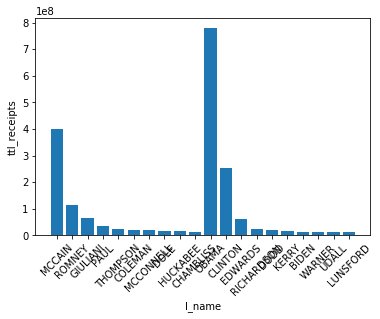

In [98]:
_.bar()

#### For 6

##### Create a view for Q6 in order for plotting.

In [59]:
%%sql
CREATE OR REPLACE VIEW q6_view AS
SELECT cmte_nm, cmte_tp, cmte_pty_affiliation, count(*) - count(CMTE_MSTR.cand_id) AS NULL_Candid, count(CMTE_MSTR.cand_id) AS candidates
FROM CMTE_MSTR, CAND_MSTR
WHERE CMTE_MSTR.cand_id = CAND_MSTR.cand_id
GROUP BY cmte_nm, CMTE_MSTR.cand_id, cmte_tp, cmte_pty_affiliation
ORDER BY candidates DESC
limit 10;

 * postgresql://student@/fec_fin
Done.


[]

In [35]:
%matplotlib inline

In [66]:
%%sql
SELECT count(cmte_pty_affiliation), cmte_pty_affiliation
FROM q6_view
GROUP BY cmte_pty_affiliation;

 * postgresql://student@/fec_fin
3 rows affected.


count,cmte_pty_affiliation
5,DEM
4,REP
0,None


([<matplotlib.patches.Wedge at 0x7fe83f3a0ba8>,
 [Text(-0.191013,1.08329,'DEM'),
  Text(0.191013,-1.08329,'REP'),
  Text(1.1,2.05979e-07,'None')])

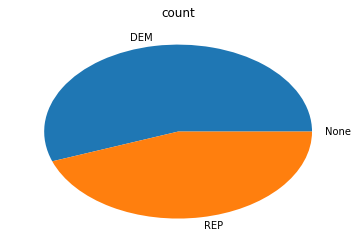

In [67]:
_.pie()
#try to use pie chart to see the porpotion of pty_affiliation,
#because it is weird to see a list of cmte_name with exactly 2 candidates in a bar chat.
#however, there should be one count of None pty type, but sql just ignores it. 

#### For Q7

##### Create a view for Q7 in order for plotting.

In [109]:
%%sql
CREATE OR REPLACE VIEW q7_view AS
(SELECT DISTINCT CAND_MSTR.cand_name, CAND_MSTR.cand_status, CAND_MSTR.cand_office_st, CAND_MSTR.cand_pty_affiliation, CAND_MSTR.cand_office, ALL_CAND.ttl_indiv_contrib, ALL_CAND.ttl_receipts
FROM CAND_MSTR, ALL_CAND
WHERE ALL_CAND.cand_id = CAND_MSTR.cand_id AND CAND_MSTR.cand_office = 'S'
ORDER BY ALL_CAND.ttl_indiv_contrib DESC
limit 10)
UNION
(SELECT DISTINCT CAND_MSTR.cand_name, CAND_MSTR.cand_status, CAND_MSTR.cand_office_st, CAND_MSTR.cand_pty_affiliation, CAND_MSTR.cand_office, ALL_CAND.ttl_indiv_contrib,ALL_CAND.ttl_receipts
FROM CAND_MSTR, ALL_CAND
WHERE ALL_CAND.cand_id = CAND_MSTR.cand_id AND CAND_MSTR.cand_office = 'H'
ORDER BY ALL_CAND.ttl_indiv_contrib DESC
limit 10)
ORDER BY ttl_indiv_contrib DESC, cand_office
;

 * postgresql://student@/fec_fin
Done.


[]

In [110]:
%matplotlib inline

In [30]:
%%sql
SELECT cand_name, cand_office, ttl_indiv_contrib
FROM q7_view;

 * postgresql://student@/fec_fin
20 rows affected.


cand_name,cand_office,ttl_indiv_contrib
"FRANKEN, AL",S,17822723.00
"COLEMAN, NORM",S,12140399.00
"DOLE, ELIZABETH",S,11348107.00
"WARNER, MARK R",S,10946768.00
"CORNYN, JOHN",S,10061260.00
"MCCONNELL, MITCH",S,9744238.00
"UDALL, MARK E",S,8867507.00
"CHAMBLISS, SAXBY",S,8042364.00
"HAGAN, KAY R",S,7254212.00
"MARTIN, JAMES FRANCIS",S,6611792.00


<BarContainer object of 20 artists>

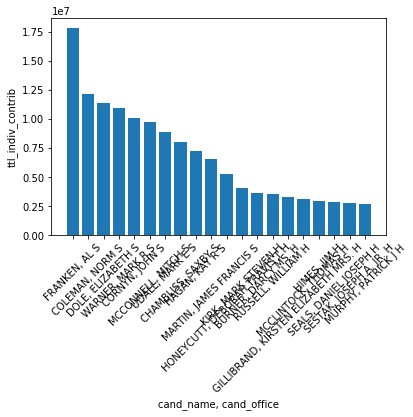

In [31]:
_.bar()